<img height="70" src="slogan.png" width="600">

<center><h1><u>Python Unit Summary Project</u></h1>

## Introducción

Para este trabajo, analizaremos los datos del Titanic y veremos si hay una correlación entre las posibilidades de supervivencia y ciertas características de cada pasajero (género, clase de cabina, precio del boleto, etc.)

El ejercicio es calificado sobre **100 puntos**

## Instrucciones generales

 - Cada operación debe realizarse en una celda separada.
 - Puedes obtener ayuda en el material de la clase y buscar información en Internet.

## Parte 1 - Análisis de Datos Guiado

1. Importa las librerías necesarias al cuaderno. (Si más adelante necesitas usar librerías adicionales, regresa a esta celda, agrega las librerías aquí y ejecuta nuevamente la celda)

> Explicación: Por orden y organización, se recomienda que todas las librerías importadas al cuaderno estén al principio del mismo.

In [9]:
# Código
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. Importa el dataset `titanic.csv` en el cuaderno. Investiga la base de datos en internet y/o utiliza la información que se detalla a continuación para comprender las columnas: **(4 puntos)**

    - **PassengerId (Identificación del pasajero)**: Identificador único para cada pasajero.  
    - **Survived (Sobreviviente)**: Indica si el pasajero sobrevivió o no al naufragio. 1 = Sobrevivió, 0 = No sobrevivió.
    - **Pclass (Clase)**: Clase del pasajero en el barco. 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase.
    - **Name (Nombre)**: Nombre del pasajero.
    - **Sex (Sexo)**: Género del pasajero.
    - **Age (Edad)**: Edad del pasajero en años.
    - **SibSp (Hermanos/Cónyuges a bordo)**: Número de hermanos o cónyuges que el pasajero tenía a bordo.
    - **Parch (Padres/Hijos a bordo)**: Número de padres o hijos que el pasajero tenía a bordo.
    - **Ticket (Boleto)**: Número del boleto del pasajero.
    - **Fare (Tarifa)**: Tarifa pagada por el pasajero.
    - **Cabin (Cabina)**: Número de la cabina del pasajero.
    - **Embarked (Puerto de embarque)**: Puerto donde el pasajero embarcó. C = Cherbourg, Q = Queenstown, S = Southampton.

In [11]:
# Código
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


3. Usando los métodos que hemos aprendido, inspecciona el dataframe y realiza lo siguiente: **(7 puntos)**

    - Revisa los valores nulos en las columnas
    - En el caso que haya valores nulos:        
        - ¿Tiene sentido que esas columnas tengan valores nulos? 
        - ¿Cuántos valores nulos existen? 
        - ¿Los valores nulos afectarán el análisis?

In [13]:
#Reviso info rápida del dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
#Reviso la dimensión del data frame
df.shape

(891, 12)

In [15]:
#Me aseguro que las columnas del df sean las que se especifican en las instrucciones generales
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
#Me aseguro que no existan filas duplicadas en el df
#Si me devuelve un valor >1 significa que hay filas duplicadas
df.value_counts().max()

1

>No tengo registros duplicados

## EDA de columnas

### PassengerId

In [20]:
#Me aseguro que los ID de pasajeros sean únicos
df['PassengerId'].is_unique

True

### Survived

In [22]:
#Me aseguro que solo tengo 2 valores únicos (0 y 1)
df['Survived'].nunique()

2

In [23]:
#Realizo conteno de valores 
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

>549 NO sobrevivieron, 342 Sí lo hicieron

### Pclass

In [26]:
#Cuento valores únicos
df['Pclass'].nunique()

3

In [27]:
#Realizo conteo de valores 
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

>La mayoría de pasajeros viajó en 3era clase

### Name

In [30]:
#Hago un muestreo de los nombres para observarlos
df['Name'].sample(50)

861                          Giles, Mr. Frederick Edward
577            Silvey, Mrs. William Baird (Alice Munger)
597                                  Johnson, Mr. Alfred
768                                  Moran, Mr. Daniel J
95                           Shorney, Mr. Charles Joseph
370                          Harder, Mr. George Achilles
11                              Bonnell, Miss. Elizabeth
364                                  O'Brien, Mr. Thomas
882                         Dahlberg, Miss. Gerda Ulrika
811                                    Lester, Mr. James
278                                   Rice, Master. Eric
539                   Frolicher, Miss. Hedwig Margaritha
462                                    Gee, Mr. Arthur H
137                          Futrelle, Mr. Jacques Heath
687                                    Dakic, Mr. Branko
196                                  Mernagh, Mr. Robert
204                             Cohen, Mr. Gurshon "Gus"
775              Myhrman, Mr. P

>Los nombres tiene prefijos como Mr, Miss, Mrs (mujer casada), Master (niño)

### Sex

In [33]:
#Realizo conteno de valores 
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

>Hay más hombres que mujeres

### Age

In [36]:
#Realizo conteno de valores para visualizar qué edades se repiten mas
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [37]:
#Conteo de valores nulos
df['Age'].isna().sum()

177

### SibSp

In [39]:
#Cuento valores únicos
df['SibSp'].nunique()

7

In [40]:
#Realizo conteno de valores 
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

>la mayoría de pasajeros viajó sin hermanos o cónyuges

### Parch

In [43]:
#Cuento valores únicos
df['Parch'].nunique()

7

In [44]:
#Realizo conteno de valores 
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

>La mayoría de pasajeros NO tenía padres o hijos a bordo.

### Ticket

In [47]:
#Compruebo si tiene valores únicos
df['Ticket'].is_unique

False

In [48]:
#Reviso el conteo de valores
df['Ticket'].value_counts().head(50)

Ticket
347082           7
CA. 2343         7
1601             7
3101295          6
CA 2144          6
347088           6
S.O.C. 14879     5
382652           5
LINE             4
PC 17757         4
17421            4
349909           4
113760           4
4133             4
113781           4
W./C. 6608       4
2666             4
19950            4
347077           4
C.A. 31921       3
PC 17572         3
C.A. 34651       3
363291           3
F.C.C. 13529     3
345773           3
248727           3
24160            3
29106            3
SC/Paris 2123    3
35273            3
371110           3
230080           3
PC 17760         3
239853           3
PC 17582         3
347742           3
110152           3
13502            3
110413           3
PC 17755         3
PC 17558         2
237736           2
17474            2
PC 17758         2
PP 9549          2
S.O./P.P. 3      2
P/PP 3381        2
PC 17485         2
2668             2
2627             2
Name: count, dtype: int64

>Se observa que existieron números de tickets repetidos.¿Cómo puede ser posible? 

In [50]:
#reviso los registros que tienen tickets repetidos
df[df['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


>Al parecer con un mismo número de ticket podía viajar una familia (madre, padre e hijos) y/o acompañantes. En este caso vemos que viajan 2 padres(Papá y Mamá) junto con sus 5 hijos. En total 7 personas que tienen el mismo número de ticket 

In [52]:
#reviso OTRO de los registros que tienen tickets repetidos
df[df['Ticket']=='W./C. 6608']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S


>Es el mismo caso de una familia: madre, padre y dos hijos

### Fare

In [55]:
#Reviso estadísticas de las tarifas
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Cabin

In [57]:
#Conteo de nulos
df['Cabin'].isna().sum()

687

>Esta es la columna donde más nulos tengo

### Embarked

In [60]:
#conteo y revision de valores
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

>La mayoría de pasajeros se embarcaron en Southampton

In [62]:
#Conteo de nulos
df['Embarked'].isna().sum()

2

>Tengo 2 nulos, lo cual es insignificante y no afectará al análisis

De forma general observo que: 
* La columna 'Age' tiene valores nulos (177 nulos), tiene tipo de dato float con edades de 34.5 lo cual debería ser tipo int. Ademas hay edades de 0.17 o 0.92 años
* La columna 'Ticket' es tipo string. Contiene letras y números en algunos casos y en otros solo números. El número del ticket se repite en muchos casos, lo cual significa que con mismo número de ticket viajaba una familia, o varias personas acompañadas.
* En la columna 'Cabin' es en donde más nulos se tiene. La mayoría de datos son nulos (687 nulos en total). Se puede eliminar toda esa columna porque no me aporta datos significativos.
* En la columna 'Name' tenemos prefijos como Mr, Miss, Mrs, Master. Se debería dar formato a esta columna?
* En la columna 'Embarked' existen 2 nulos. Los cuales son insignificantes y no afectarán al análisis

#### Respuesta

- Tenemos pérdida de datos en la columna 'Cabin'. Son 687 nulos en total. Tiene sentido que la mayoría de datos sean nulos ya que puede ser información que nunca se recuperó del barco. Sin embargo, la falta de datos no afectará el análisis ya que es un atributo irrelevante para el caso de estudio. Podemos prescindir de esta columna al tener su mayoría de registros nulos.
- En la columna 'Age' también tenemos pérdida de datos. Son1776 nulos en total.No tiene sentido que existan nulos ya que la mayoría del resto de datos sí tiene asignada una edad. En este caso sí va a afectar al análisis la falta de esos datos ya que es un atributo importante para este caso de estudio.
- En la columna 'Embarked' existen 2 nulos, los cual es insignificante y no afectará al análisis

4. Eliminar la columna `Cabin` del df **(4 punto)**

In [68]:
# Código
df.drop('Cabin',axis=1,inplace=True)

In [69]:
#Muestro df con la columna 'Cabin' eliminada
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


5. Actualiza los valores nulos de la columna `Age` para las mujeres, usando el valor de la mediana de edad de todas las pasajeras mujeres **(7 puntos)**

In [71]:
#Filtro por género femenino
mask_female=df['Sex']=='female'

In [72]:
#Determino la mediana de edad de mujeres
median_age_female=df.loc[mask_female,'Age'].median()

median_age_female

27.0

In [73]:
#Reemplazo valores nulos con la media de edad de mujeres
df.loc[mask_female,'Age']=df.loc[mask_female,'Age'].fillna(median_age_female)

6. Actualiza los valores nulos de la columna `Age` para los hombres, usando el valor de la mediana de edad de todos los pasajeros hombres **(7 puntos)**

In [75]:
#Filtro por género masculino
mask_male=df['Sex']=='male'

In [76]:
#Determino la mediana deedad de hombres
median_age_male=df.loc[mask_male,'Age'].median()

median_age_male

29.0

In [77]:
#Reemplazo valores nulos con la media de edad de hombres
df.loc[mask_male,'Age']=df.loc[mask_male,'Age'].fillna(median_age_male)

In [78]:
#compruebo que la columna 'Age' ya no tiene nulos
df['Age'].isna().sum()

0

7. Rellena el valor faltante en la columna de `Embarked` con el valor más común (el valor que más se repite en esta columna) **(7 puntos)**

In [80]:
#Reviso los valores que más se repiten
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [81]:
#Creo una variable y almaceno el valor que más se repite
most_repeated=df['Embarked'].value_counts().index[0]

most_repeated

'S'

In [82]:
#reemplazo nulos con el valor más repetido
df['Embarked']=df['Embarked'].fillna(most_repeated)

In [83]:
#compruebo que la columna 'Embarked' ya no tiene nulos
df['Embarked'].isna().sum()

0

8. Crear un gráfico para mostrar la distribución de pasajeros por género (`Sex`) en porcentaje. Escoge un gráfico claro y presentable. **(7 puntos)**

In [85]:
#Agrupo los datos por género
df.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

<Axes: title={'center': 'Distribución de Pasajeros por Género'}>

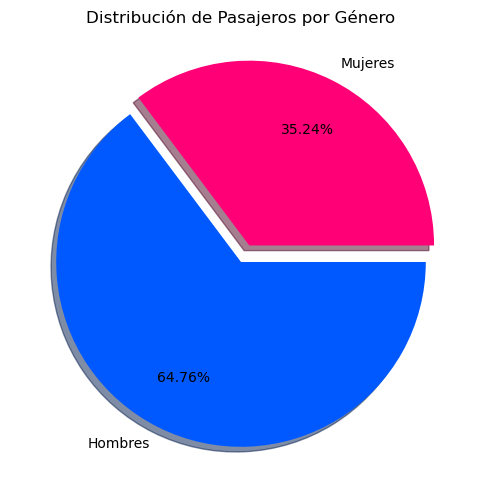

In [86]:
df.groupby('Sex')['PassengerId'].count().plot.pie(colors=('#FF0076','#0059FF'),
                                                 labels=('Mujeres', 'Hombres'),
                                                 autopct='%1.2f%%',
                                                 pctdistance=0.7,
                                                 shadow=True, 
                                                 explode=(0.1, 0),                                         
                                                 figsize=(6,6),
                                                 title='Distribución de Pasajeros por Género',
                                                 ylabel=''
                                                )

9. Crear un gráfico para mostrar la distribución de pasajeros por género (`Sex`) y si sobrevivieron (`Survived`). Escoge un gráfico claro y presentable. **(7 puntos)**

In [88]:
# Creo una pivot table y la guardo en una variable
df_pivot=df.pivot_table(columns='Survived',
               index='Sex',
               values='PassengerId',
               aggfunc='count',
              )

df_pivot

Survived,0,1
Sex,,
female,81,233
male,468,109


In [89]:
#Porcentaje de mujeres que sobrevivieron 
(233/342)*100

68.12865497076024

[Text(0, 0, '314'), Text(0, 0, '577')]

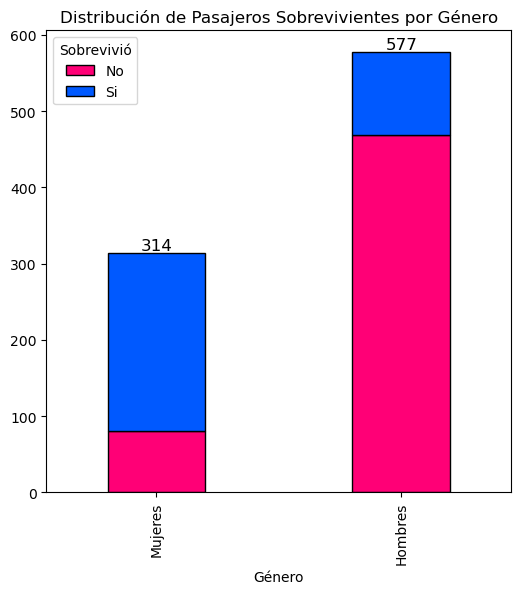

In [90]:
#Creo un gráfico de barras apiladas
graph1=df_pivot.plot.bar(width=0.4,
              color=('#FF0076','#0059FF'),
              edgecolor='black',
              xlabel='Género',           
              figsize=(6,6),
              title='Distribución de Pasajeros Sobrevivientes por Género',          
              stacked=True)

#Modifico nombres mostrados en leyenda
plt.legend(labels=['No','Si'],
           title='Sobrevivió')

#Modifico nombres mostrados en series del eje X
graph1.set_xticklabels(['Mujeres','Hombres'])

#Agrego etiquetas de datos
plt.bar_label(graph1.containers[1],size=12)


>El número de mujeres sobrevivientes es el doble que el de los hombres sobrevivientes

>Hubo aproximadamente 5 veces más fallecidos del género masculino que del femenino

10. Usa un gráfico displot para mostrar la distribución de los pasajeros por edades. Sigue las siguientes instrucciones: **(10 puntos)**

    - Separa en dos gráficos según los valores en la columna de género (`Sex`).
    - Dentro de cada gráfico, divide los datos en series según los datos en la columna `Survived`.
    - Configura la visualización para que los datos estén apilados.
    
Vista previa:   


<img height="40" src="preview.png" width="800">

C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


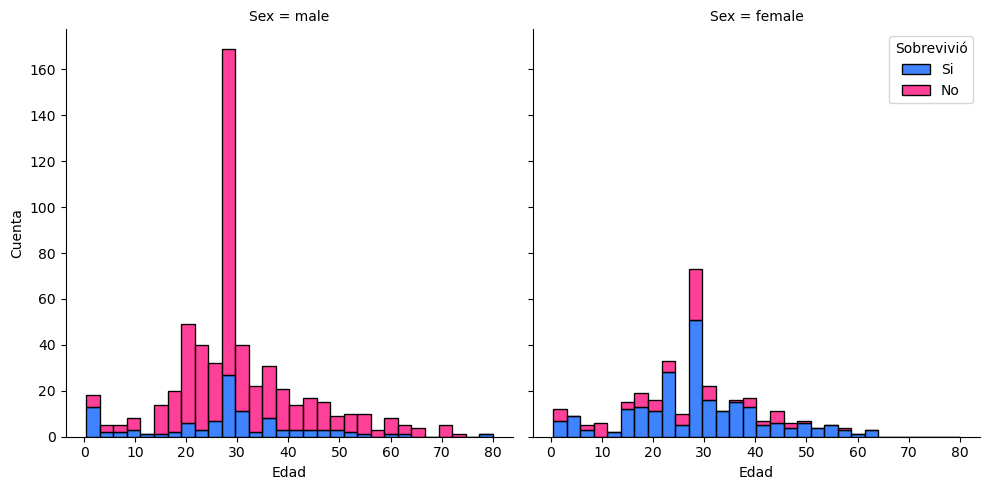

In [94]:
# Código
graph2=sns.displot(df,
            palette=('#FF0076','#0059FF'),
            x='Age',
            hue='Survived',
            multiple='stack',
            col='Sex',
            legend=False)


#Modifico nombres mostrados en leyenda
plt.legend(labels=['Si','No'],
           title='Sobrevivió')

#Modifico nombres de los ejes
graph2.set_axis_labels(x_var='Edad',y_var='Cuenta')



11. Ahora, examina si existe una correlación entre las diferentes columnas. Para ello, selecciona solo las columnas que tengan significado (por ejemplo, el número de pasajeros puede variar, pero esta cifra no afecta a los resultados del análisis). **(10 puntos)**

    - Crea una tabla de correlación aplicando el método `corr()` a los datos. Guarda el resultado en una variable llamada `corr_mtx`.
    - Crea un gráfico de mapa de calor que se ejecutará en los datos de la tabla de correlación y diséñalo como desees.
    - ¿Existe una correlación positiva fuerte (valores cercanos a 1) o una correlación negativa (valores cercanos a -1) entre alguna de las columnas?

In [96]:
#Recordando columnas y datos que tiene el df
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [97]:
#Creo matriz de correlación solo con las variables numéricas del df
df.corr(numeric_only=True)



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035734,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.073296,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.338056,0.083081,0.018443,-0.549500
Age,0.035734,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,0.094161
SibSp,-0.057527,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176038,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.094161,0.159651,0.216225,1.000000


>Esta matriz de correlación no me dice nada. no hay ningun valor del coeficiente de correlación que sea significativo entre las columnas mostradas. Además, las columnas que tienen mayor significado para el análisis son de tipo sting, por lo que voy a recurrir a una técnica de one-hot encoding para transformar esas variables categóricas a numéricas.

### Creando nuevo dataset con columnas calculadas para matriz correlacion

In [100]:
#Recordando columnas que tiene el df
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [101]:
#Uso solo las columnas que son significantes para el analisis
df_new=df[['Survived','Pclass','Sex','Age','Fare','Embarked']]

df_new

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,27.0,23.4500,S
889,1,1,male,26.0,30.0000,C


In [102]:
#Veo los valores que tiene la columna SibSp. Quiero saber si los pasajeros que tienen hermanos o conyuges tienen mayor probabilidad de sobrevivir
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [103]:
#Creo una nueva columna para identificar si el pasajero tiene al menos 1 conyuge o 1 hermano
#True=Si tiene cónyuge/Si tiene hermanos
#False=No tiene cónyuge/No tiene hermanos
df_new['has_SibSp']=df['SibSp']!=0

C:\Users\mateo\AppData\Local\Temp\ipykernel_14504\1287858176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['has_SibSp']=df['SibSp']!=0


In [104]:
#Veo los valores que tiene la columna Parch. Quiero saber si los pasajeros que son padres/madres o los niños que tienen padres tienen mayor probabilidad de sobrevivir
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [105]:
#Creo una nueva columna para identificar si el pasajero tiene al menos 1 hijo o 1 padre
#False=No tiene hijos/No tiene padres
#True=Si tiene hijos/Si tiene padres
df_new['has_Parch']=df['Parch']!=0

C:\Users\mateo\AppData\Local\Temp\ipykernel_14504\3562203571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['has_Parch']=df['Parch']!=0


In [106]:
#Agrego una columna para determinar si el pasajero era mayor de edadd (>18 años). 
df_new['>18 years']=df['Age']>18

C:\Users\mateo\AppData\Local\Temp\ipykernel_14504\522209939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['>18 years']=df['Age']>18


In [107]:
#muestro nuevo df
df_new

,Survived,Pclass,Sex,Age,Fare,Embarked,has_SibSp,has_Parch,>18 years
0,0,3,male,22.0,7.2500,S,True,False,True
1,1,1,female,38.0,71.2833,C,True,False,True
2,1,3,female,26.0,7.9250,S,False,False,True
3,1,1,female,35.0,53.1000,S,True,False,True
4,0,3,male,35.0,8.0500,S,False,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,False,False,True
887,1,1,female,19.0,30.0000,S,False,False,True
888,0,3,female,27.0,23.4500,S,True,True,True
889,1,1,male,26.0,30.0000,C,False,False,True


In [108]:
#Convierto datos string a numéricos y creo matriz de correlación
corr_mtx=pd.get_dummies(df_new, columns=['Survived', 'Pclass', 'Sex','Embarked', 'has_SibSp', 'has_Parch','>18 years']).corr()

corr_mtx

,Age,Fare,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,has_SibSp_False,has_SibSp_True,has_Parch_False,has_Parch_True,>18 years_False,>18 years_True
Age,1.000000,0.094161,0.073296,-0.073296,0.322871,0.014199,-0.289743,-0.095256,0.095256,0.030385,-0.032994,-0.005855,0.148402,-0.148402,0.257821,-0.257821,-0.618695,0.618695
Fare,0.094161,1.000000,-0.257307,0.257307,0.591711,-0.118557,-0.413333,0.182333,-0.182333,0.269335,-0.117216,-0.162184,-0.192190,0.192190,-0.237717,0.237717,0.002567,-0.002567
Survived_0,0.073296,-0.257307,1.000000,-1.000000,-0.285904,-0.093349,0.322308,-0.543351,0.543351,-0.168240,-0.003650,0.149683,0.115867,-0.115867,0.147408,-0.147408,-0.105873,0.105873
Survived_1,-0.073296,0.257307,-1.000000,1.000000,0.285904,0.093349,-0.322308,0.543351,-0.543351,0.168240,0.003650,-0.149683,-0.115867,0.115867,-0.147408,0.147408,0.105873,-0.105873
Pclass_1,0.322871,0.591711,-0.285904,0.285904,1.000000,-0.288585,-0.626738,0.098013,-0.098013,0.296423,-0.155342,-0.161921,-0.058470,0.058470,-0.008373,0.008373,-0.127727,0.127727
Pclass_2,0.014199,-0.118557,-0.093349,0.093349,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.125416,-0.127301,0.189980,-0.033099,0.033099,-0.039091,0.039091,0.002255,-0.002255
Pclass_3,-0.289743,-0.413333,0.322308,-0.322308,-0.626738,-0.565210,1.000000,-0.137143,0.137143,-0.153329,0.237449,-0.015104,0.077316,-0.077316,0.039029,-0.039029,0.108214,-0.108214
Sex_female,-0.095256,0.182333,-0.543351,0.543351,0.098013,0.064746,-0.137143,1.000000,-1.000000,0.082853,0.074115,-0.119224,-0.203203,0.203203,-0.247523,0.247523,0.123111,-0.123111
Sex_male,0.095256,-0.182333,0.543351,-0.543351,-0.098013,-0.064746,0.137143,-1.000000,1.000000,-0.082853,-0.074115,0.119224,0.203203,-0.203203,0.247523,-0.247523,-0.123111,0.123111
Embarked_C,0.030385,0.269335,-0.168240,0.168240,0.296423,-0.125416,-0.153329,0.082853,-0.082853,1.000000,-0.148258,-0.782742,-0.034759,0.034759,-0.032550,0.032550,0.014164,-0.014164


<Axes: >

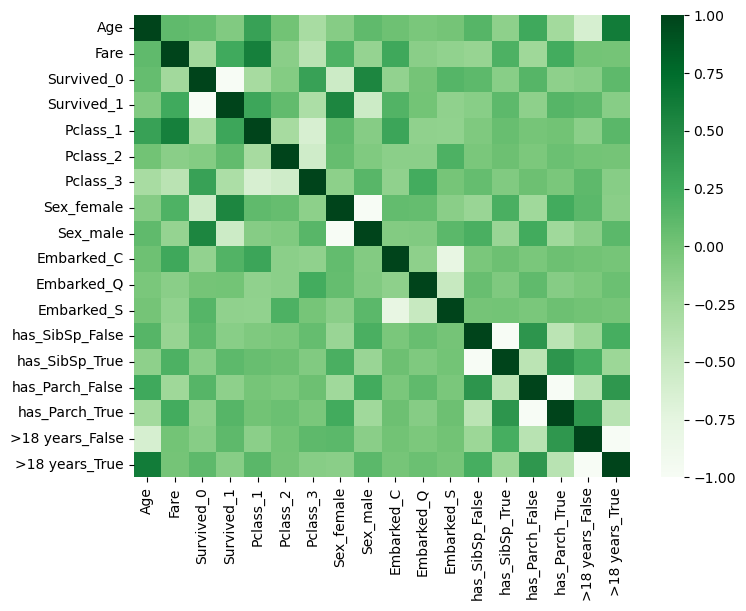

In [109]:
#Creo mapa de calor
plt.figure(figsize=(8,6))
#sns.set_context('paper', font_scale=1.4)
sns.heatmap(corr_mtx, cmap='Greens')

### Respuesta

>En general, no existen correlaciones fuertes entre las columnas del dataset. Las correlaciones más altas encontradas son:

 * 0.54 es la correlación entre mujeres y el estado de supervivencia y 0.54 la correlación entre hombres y NO supervivencia.
 * 0.59 es la correlación entre fare y 1era clase. Lo que tiene sentido ya que la primera clase, al ser más exclusiva, es más costosa.


## Parte 2 - Análisis continuo

12. Define 3 preguntas de investigación para analizar quién tiene una alta probabilidad de sobrevivir, y luego responde a las preguntas que has definido. **(30 puntos)**

## 1. ¿Qué características tienen las mujeres con mayor probabilidad de sobrevivir?

In [115]:
# extraigo el prefijo en el nombre del pasajero y cuento esos valores
df['Name'].str.split(',').str[-1].str.split('.').str[0].value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

>Consultando en internet el significado de estos prefijos sabemos que:

* Mr: título que se le da a un hombre mayor a 18 años (señor)
* Master: título que se le da al hombre menor a 18 años (joven/niño)
* Miss: título que se le da a las mujeres jóvenes y a las mujeres solteras (señorita)
* Mrs: título que se le da a las mujeres casadas (señora)
* Dr: título de doctor
* Rev(Reverend): título que se le da a los miembros del clérigo cristiano
* Mlle(Mademoiselle): En francés, cortesía que se le da a las mujeres solteras
* Major: título que se le da a las personas de rango militar
* Col(Colonel): Coronel, rango militar
* the countess: la condesa
* Capt: capitán, rango militar
* Ms: título para referirse a una mujer sin especificar su estado civil (Es el equivalente a Mr en los hombres)
* Sir: tíulo que se le da a un hombre que ha sido nombrado caballero por un monarca británico
* Lady: Se utiliza antes de los nombres de mujeres con ciertos títulos, como condesa, marquesa, vizcondesa o baronesa.
* Mme (Madame): En Francia se usa para referirse a una mujer
* Jonkheer una persona que era hijo joven y soltero de un caballero o noble de alto rango.
>Los prefijos con mínima frecuencia de aparición no se considerarán para la respuesta a esta pregunta

In [117]:
# agrego como una nueva columna al df y elimino los espacios 
df['title_name']=df['Name'].str.split(',').str[-1].str.split('.').str[0].str.strip()

In [118]:
# Filtro por género femenino y si sobrevivió
mask_f_survived=(df['Sex']=='female') & (df['Survived']==1)

#Creo nuevo df para analizarlo
df_female_survived=df.loc[mask_f_survived]

df_female_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title_name
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C,Mrs
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C,Miss
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,Mrs


In [119]:
df_female_survived['title_name'].value_counts()

title_name
Miss            127
Mrs              99
Mlle              2
Mme               1
Ms                1
Lady              1
the Countess      1
Dr                1
Name: count, dtype: int64

### ¿Cómo influye el estado civil en la probabilidad de supervivencia de las mujeres?

In [121]:
# filtro mujeres casadas & solteras
#Recordando que 'Mrs' = casada y 'Miss' = soltera
mask_marital_married=df_female_survived['title_name']=='Mrs'
mask_marital_single=df_female_survived['title_name']=='Miss'

df_female=df_female_survived[(mask_marital_married)|(mask_marital_single)]

df_female


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title_name
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C,Mrs
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C,Miss
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,Mrs


In [122]:
#Hago conteo de valores
df_female['title_name'].value_counts()

title_name
Miss    127
Mrs      99
Name: count, dtype: int64

<Axes: title={'center': 'Estado civil de mujeres sobrevivientes'}>

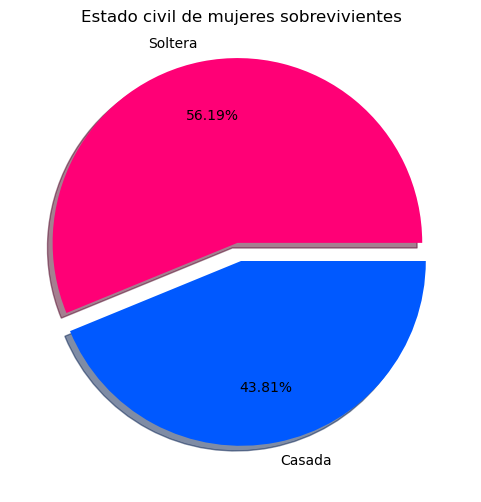

In [123]:
# Creo un gráfico de pastel
df_female['title_name'].value_counts().plot.pie(colors=('#FF0076','#0059FF'),
                                                 labels=('Soltera', 'Casada'),
                                                 autopct='%1.2f%%',
                                                 pctdistance=0.7,
                                                 shadow=True, 
                                                 explode=(0.1, 0),                                         
                                                 figsize=(6,6),
                                                 title='Estado civil de mujeres sobrevivientes',
                                                 ylabel=''
                                                )

>Las mujeres solteras tienen mayor probabilida de sobrevivir

### ¿Cómo influye la mayoría de edad en la posibilidad de supervivencia de las mujeres?

In [126]:
# filtro por mayoría de edad y agrego nueva columna al df 
df_female['>18 years']=df_female['Age']>18

#Compruebo columna agragada
df_female.head(3)

C:\Users\mateo\AppData\Local\Temp\ipykernel_14504\1302323790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['>18 years']=df_female['Age']>18


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title_name,>18 years
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,True


In [127]:
# Creo una pivot table y la guardo en una variable
df_pivot2=df_female.pivot_table(columns='>18 years',
               index='title_name',
               values='PassengerId',
               aggfunc='count',
               )

df_pivot2

>18 years,False,True
title_name,,
Miss,40,87
Mrs,6,93


[Text(0, 0, '127'), Text(0, 0, '99')]

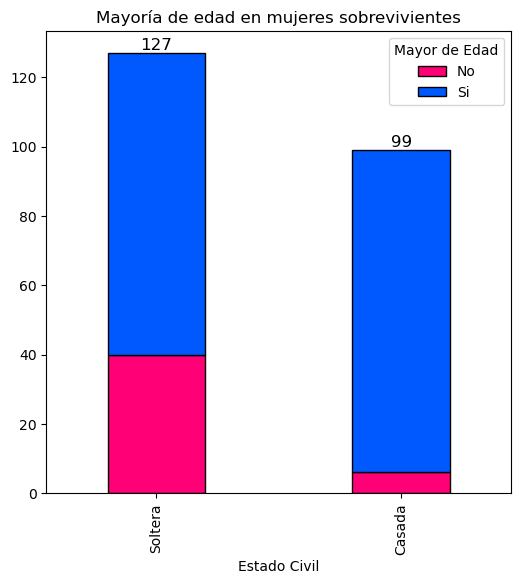

In [128]:
#Creo un gráfico de barras apiladas
graph2=df_pivot2.plot.bar(width=0.4,
              color=('#FF0076','#0059FF'),
              edgecolor='black',
              xlabel='Estado Civil',           
              figsize=(6,6),
              title='Mayoría de edad en mujeres sobrevivientes',          
              stacked=True)

#Modifico nombres mostrados en leyenda
plt.legend(labels=['No','Si'],
           title='Mayor de Edad')

#Modifico nombres mostrados en series del eje X
graph2.set_xticklabels(['Soltera','Casada'])

#Agrego etiquetas de datos
plt.bar_label(graph2.containers[1],size=12)

### Respuesta

>El 68.13% de sobrevivientes fueron del género femenino. De este grupo, el 56.19% eran solteran  y el 68.5% de solteras eran mayores de edad.
Por tanto, las mujeres solteras y mayores de edad tienen mayores probabilidades de sobrevivir.

>Reflexiones personales: Observo un claro comportamiento a priorizar la vida y supervivencia de las mujeres. Quizá en aquellas épocas, la caballerocidad llevaba a actuar a los hombres a salvar la vida de las mujeres en general. Especialmente, según mi parecer, si se trababa de sus cónyuges o hijas.

## 2. ¿Tuvieron mayor probabilidad de sobrevivir los niños/niñas que viajaron con sus padres que aquellos que no?

In [133]:
#filtro niñ@s <18 años
#Recordando que Master son hombres <18 y Miss señoritas solteras que pueden ser mayores o no a los 18 años.
mask_master=((df['title_name']=='Master') | (df['title_name']=='Miss')) & (df['Age']<18) 

In [134]:
#Creo un nuevo data frame con las columnas de interes para el análisis
df_master=df.loc[mask_master,['PassengerId','Survived','title_name','Parch']]
df_master

,PassengerId,Survived,title_name,Parch
7,8,0,Master,1
10,11,1,Miss,1
14,15,0,Miss,0
16,17,0,Master,1
22,23,1,Miss,0
...,...,...,...,...
850,851,0,Master,2
852,853,0,Miss,1
853,854,1,Miss,1
869,870,1,Master,1


In [135]:
#Creo una nueva columna que me idica si el niño viajó con almenos uno de los padres y la agrego al df
df_master['Parch>=1']=df_master['Parch']>=1
#compruebo columna agragada
df_master

,PassengerId,Survived,title_name,Parch,Parch>=1
7,8,0,Master,1,True
10,11,1,Miss,1,True
14,15,0,Miss,0,False
16,17,0,Master,1,True
22,23,1,Miss,0,False
...,...,...,...,...,...
850,851,0,Master,2,True
852,853,0,Miss,1,True
853,854,1,Miss,1,True
869,870,1,Master,1,True


In [136]:
# Creo tabla pivot con los datos
df_pivot3=df_master.pivot_table(columns=['Parch>=1'],
               index='Survived',
               values='PassengerId',
               aggfunc='count',
               )

df_pivot3

Parch>=1,False,True
Survived,,
0,3,29
1,11,44


In [137]:
#Porcentaje de niños que sobrevivió y viajaron con almenos 1 de los padres
#Recordando que 0 = NO sobrevivió y 1 = Sobrevivió
(44/87)*100


50.57471264367817

[Text(0, 0, '32'), Text(0, 0, '55')]

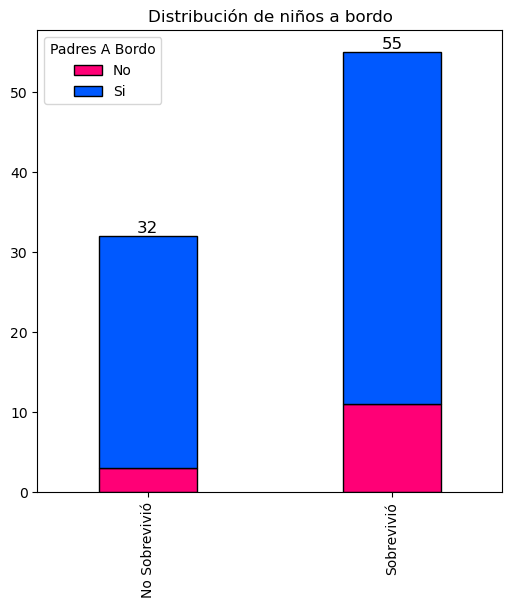

In [138]:
graph3=df_pivot3.plot.bar(width=0.4,
              color=('#FF0076','#0059FF'),
              edgecolor='black',
              xlabel='',           
              figsize=(6,6),
              title='Distribución de niños a bordo',          
              stacked=True)

#Modifico nombres mostrados en leyenda
plt.legend(labels=['No','Si'],
           title='Padres A Bordo')

#Modifico nombres mostrados en series del eje X
graph3.set_xticklabels(['No Sobrevivió','Sobrevivió'])


#Agrego etiquetas de datos
plt.bar_label(graph3.containers[1],size=12)

### Repuesta
    

>Tienen mayor probabilidad de supervivencia los niños que viajaron con al menos uno de sus padres. Los datos muestras que el El 50.57% de los niños/niñas de este grupo sobrevivieron.

>Reflexiones personales: Como es natural en el ser humano, la vida de los niños/niñas se prioriza. Más aún cuando uno es padre y sus hijos corren peligro. En este evento no es la excepción. Los niños que sobrevivieron son casi el doble de los que NO sobrevivieron. El factor de estar acompañados de sus padres me hace llegar a la conjetura de que en esos momentos de desesperación, los padres hiciron todo lo posible por salvar a sus hijos. Incluso sacrificándose ellos mismos.

## 3. ¿Las personas más adineradas y de mayor status tuvieron mayores probabilidades de sobrevivir?

In [143]:
#Ordeno df de forma descendente en base a la columna 'Fare'. Observo cuáles fueron los Fare más altos
df.sort_values('Fare', ascending=False).head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title_name
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,C,Miss
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,C,Mr
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,C,Mr
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,S,Miss
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,S,Mr
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,S,Miss
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,S,Mr
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,C,Miss
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,C,Miss
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,C,Mr


> Como ya se sabía, los Fare más altos corresponden a la primera clase

In [145]:
#Analizo los precios de 'Fare' solo para primera clase
df.loc[df['Pclass']==1,'Fare'].describe()

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64

In [146]:
df.loc[df['Pclass']==1,'Fare'].value_counts().head(50)

Fare
26.5500     15
52.0000      7
53.1000      5
30.0000      5
30.5000      5
0.0000       5
263.0000     4
27.7208      4
227.5250     4
90.0000      4
110.8833     4
35.5000      4
151.5500     4
120.0000     4
79.2000      4
26.2875      3
52.5542      3
86.5000      3
77.9583      3
79.6500      3
153.4625     3
135.6333     3
29.7000      3
31.0000      3
83.1583      3
113.2750     3
512.3292     3
76.7292      3
211.3375     3
30.6958      2
82.1708      2
262.3750     2
164.8667     2
134.5000     2
57.9792      2
39.6000      2
133.6500     2
71.0000      2
69.3000      2
106.4250     2
146.5208     2
51.8625      2
55.9000      2
93.5000      2
89.1042      2
49.5042      2
56.9292      2
108.9000     2
247.5208     2
25.9292      2
Name: count, dtype: int64

Observo que tengo 5 valores con 0.00, no los voy a considerar para que no me alteren mis valores estadísticos

In [148]:
#filtro valores para no considerar los que tienen Fare=0.00
mask_fare=(df['Pclass']==1) & (df['Fare']!=0)

df.loc[mask_fare,'Fare'].describe()

count    211.000000
mean      86.148874
std       78.212155
min        5.000000
25%       32.910400
50%       61.979200
75%       99.962500
max      512.329200
Name: Fare, dtype: float64

>El promedio de la tarifa que los pasajeros pagaron por ir en primera clase fue de $86.14

In [150]:
#Obtengo la media 
df.loc[mask_fare,'Fare'].median()

61.9792

>La median de la tarifa que los pasajeros pagaron por ir en primera clase fue de $61.97

In [152]:
#Filtro registros para aquellos pasajeros que viajaron en primera clase
df.loc[df['Pclass']==1,'Survived'].value_counts()

Survived
1    136
0     80
Name: count, dtype: int64

<Axes: title={'center': 'Distribución de pasajeros de 1ra Clase '}>

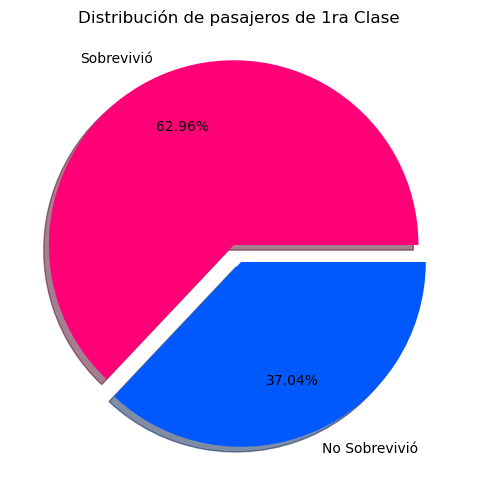

In [153]:
#Creo un gráfico de pastel
df.loc[df['Pclass']==1,'Survived'].value_counts().plot.pie(colors=('#FF0076','#0059FF'),
                                                 labels=('Sobrevivió', 'No Sobrevivió'),
                                                 autopct='%1.2f%%',
                                                 pctdistance=0.7,
                                                 shadow=True, 
                                                 explode=(0.1, 0),                                         
                                                 figsize=(6,6),
                                                 title='Distribución de pasajeros de 1ra Clase ',
                                                 ylabel=''
                                                )

>Un gran 63% de los pasajeros de la primera clase sobrevivió

In [155]:
#Recordando la cantidad de personas que sobrevivieron
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [156]:
#Calculo porcentaje de sobrevivientes que viajó en primera clase
(136/342)*100

39.76608187134503

>Casi el 40% de los sobrevivientes totales viajaron en primera clase, la clase más costosa

In [248]:
#Reviso los títulos de las personas que viajaron en la primera clase
df.loc[df['Pclass']==1,'title_name'].value_counts()

title_name
Mr              107
Miss             46
Mrs              42
Dr                5
Master            3
Major             2
Mlle              2
Col               2
Don               1
Mme               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

>En la primera clase se encontraban, además, las personas de más alto estatus. Como vimos en la descripción de los prefijos, encontramos los valores únicos tales como Dr,Rev,Major,Col,the Countess,Capt,Sir,Lady,Jonkheer (Títulos que no aparecen en las tras clases)

### Respuesta

> Las personas que viajaron en primera clase tienen mayor probabilidad de sobrevivir. Los datos nos revelan que el 63% de los pasajeros de la primera clase sobrevivió. Dichas personas representan el 40% de los sobrevivientes totales.

>Reflexiones personales: La clase alta tuvo una buena probabilidad de supervivencia. Puede deberse, en mi opinión, a que al ser una clase que podía acceder a mayores conocimientos en aquella época como: bibliotecas, libros o una educación provilegiada. Y por lo tanto, pudo haberse apalancado de esos conocimientos para idearse cómo sobrevivir durante el hundimiento.
>Otra idea es que al ser una clase social alta e importante, se dió prioridad y privilegio para su búsqueda y rescate.